In [390]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [391]:
mpl.rcParams['figure.figsize'] = (15, 7)
# mpl.rcParams['axes.grid'] = False

## Предобработка

- 2021-07-10 - дата начала сбора 'total_oi', 'binance_spot_price', 'binance_weighted_acc_ratio', 'binance_weighted_position_ratio'
- 2022-10-14 - дата начала сбора всех данных

In [392]:
df = pd.read_csv('C:/Users/Pc/ML/creepto_app_stat_data_coin_btc.csv', parse_dates=['timestamp'], index_col='timestamp')

In [393]:
df = df.sort_values('timestamp', ascending=True).drop('#', axis = 1)

In [394]:
df.head()

,total_oi,binance_usd_m_oi,binance_coinm_oi,binance_usd_m_acc_ratio,binance_coin_m_acc_ratio,binance_usd_m_position_ratio,binance_coin_m_position_ratio,binance_spot_price,okex_spot_price,ftx_spot_price,binance_perp_price,okex_perp_price,ftx_perp_price,derebit_perp_price,bybit_perp_price,market_cap,exchanges_balance,bybit_spot_price,binance_weighted_acc_ratio,binance_weighted_position_ratio
timestamp,,,,,,,,,,,,,,,,,,,,
2021-07-10 12:00:00,1.032000e+10,NaN,NaN,NaN,NaN,NaN,NaN,33800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.474762,1.056429
2021-07-11 12:00:00,1.027000e+10,NaN,NaN,NaN,NaN,NaN,NaN,33500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.311786,1.050833
2021-07-12 12:00:00,1.054000e+10,NaN,NaN,NaN,NaN,NaN,NaN,34200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.229419,1.058605
2021-07-13 12:00:00,1.036000e+10,NaN,NaN,NaN,NaN,NaN,NaN,33000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.940000,1.049412
2021-07-14 12:00:00,1.037000e+10,NaN,NaN,NaN,NaN,NaN,NaN,32500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.006889,1.049778


In [395]:
df.query('binance_perp_price.notna()').head()

,total_oi,binance_usd_m_oi,binance_coinm_oi,binance_usd_m_acc_ratio,binance_coin_m_acc_ratio,binance_usd_m_position_ratio,binance_coin_m_position_ratio,binance_spot_price,okex_spot_price,ftx_spot_price,binance_perp_price,okex_perp_price,ftx_perp_price,derebit_perp_price,bybit_perp_price,market_cap,exchanges_balance,bybit_spot_price,binance_weighted_acc_ratio,binance_weighted_position_ratio
timestamp,,,,,,,,,,,,,,,,,,,,
2022-10-14 01:05:00,1.130000e+10,154286.77,27021.24,1.6518,2.8256,1.2172,1.0412,19423.77,19425.0,19432.0,19412.9,19426.0,19426.0,19425.5,19414.5,3.724892e+11,2379265.98,19423.37,1.826737,1.190970
2022-10-14 01:10:00,1.130000e+10,154326.80,27028.84,1.6497,2.8256,1.2190,1.0405,19421.10,19419.8,19421.0,19407.3,19418.2,19417.0,19411.5,19411.0,3.725276e+11,2379265.98,19419.73,1.824954,1.192397
2022-10-14 01:20:00,1.130000e+10,154696.77,26931.53,1.6469,2.8344,1.2205,1.0372,19446.87,19448.3,19452.0,19440.0,19449.3,19447.0,19445.0,19438.0,3.727227e+11,2379265.98,19448.15,1.822980,1.193321
2022-10-14 01:25:00,1.130000e+10,154715.08,26941.53,1.6469,2.8300,1.2204,1.0356,19448.93,19448.6,19451.0,19440.3,19449.8,19447.0,19448.0,19434.5,3.728931e+11,2379265.98,19449.53,1.822366,1.192992
2022-10-14 01:55:00,1.130000e+10,148988.41,26199.67,1.7071,2.8506,1.2446,1.0291,19922.34,19923.1,19925.0,19917.9,19926.9,19924.0,19918.5,19913.0,3.802337e+11,2379265.98,19921.30,1.878112,1.212372


In [396]:
df['2022-09'].describe().T

C:\Users\Pc\AppData\Local\Temp\ipykernel_19800\4042322751.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2022-09'].describe().T


,count,mean,std,min,25%,50%,75%,max
total_oi,29.0,9.867931e+09,3.534360e+08,9.390000e+09,9.610000e+09,9.720000e+09,1.000000e+10,1.067000e+10
binance_usd_m_oi,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
binance_coinm_oi,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
binance_usd_m_acc_ratio,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
binance_coin_m_acc_ratio,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
binance_usd_m_position_ratio,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
binance_coin_m_position_ratio,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
binance_spot_price,29.0,1.977276e+04,7.775837e+02,1.870000e+04,1.925000e+04,1.973100e+04,2.000000e+04,2.174000e+04
okex_spot_price,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ftx_spot_price,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [397]:
df[df.index >'2022-10'].describe().T

,count,mean,std,min,25%,50%,75%,max
total_oi,4400.0,1.120951e+10,3.299468e+08,9.110000e+09,1.100000e+10,1.110000e+10,1.140000e+10,1.220000e+10
binance_usd_m_oi,4383.0,1.538682e+05,6.630978e+03,1.424837e+05,1.488685e+05,1.521412e+05,1.570474e+05,1.705361e+05
binance_coinm_oi,4383.0,2.638108e+04,6.098787e+02,2.455491e+04,2.583426e+04,2.647968e+04,2.687370e+04,2.838143e+04
binance_usd_m_acc_ratio,4386.0,1.669722e+00,5.325090e-01,7.129000e-01,1.199300e+00,1.818100e+00,2.064700e+00,3.025800e+00
binance_coin_m_acc_ratio,4386.0,2.608412e+00,4.592833e-01,1.677400e+00,2.304975e+00,2.770700e+00,2.950600e+00,3.310300e+00
binance_usd_m_position_ratio,4383.0,1.263013e+00,3.211722e-02,1.192200e+00,1.241150e+00,1.257200e+00,1.279100e+00,1.342900e+00
binance_coin_m_position_ratio,4383.0,1.067517e+00,2.645634e-02,1.018600e+00,1.051400e+00,1.061100e+00,1.072400e+00,1.125400e+00
binance_spot_price,4399.0,1.957390e+04,5.773826e+02,1.873694e+04,1.916389e+04,1.929269e+04,1.984910e+04,2.096699e+04
okex_spot_price,4387.0,1.957428e+04,5.776640e+02,1.874020e+04,1.916395e+04,1.929280e+04,1.985335e+04,2.096220e+04
ftx_spot_price,4387.0,1.957619e+04,5.797380e+02,1.873500e+04,1.916500e+04,1.929400e+04,1.985600e+04,2.097600e+04


In [398]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
total_oi,4826.0,1.135681e+10,1.032678e+09,8.120000e+09,1.100000e+10,1.110000e+10,1.140000e+10,2.234000e+10
binance_usd_m_oi,4383.0,1.538682e+05,6.630978e+03,1.424837e+05,1.488685e+05,1.521412e+05,1.570474e+05,1.705361e+05
binance_coinm_oi,4383.0,2.638108e+04,6.098787e+02,2.455491e+04,2.583426e+04,2.647968e+04,2.687370e+04,2.838143e+04
binance_usd_m_acc_ratio,4386.0,1.669722e+00,5.325090e-01,7.129000e-01,1.199300e+00,1.818100e+00,2.064700e+00,3.025800e+00
binance_coin_m_acc_ratio,4386.0,2.608412e+00,4.592833e-01,1.677400e+00,2.304975e+00,2.770700e+00,2.950600e+00,3.310300e+00
binance_usd_m_position_ratio,4383.0,1.263013e+00,3.211722e-02,1.192200e+00,1.241150e+00,1.257200e+00,1.279100e+00,1.342900e+00
binance_coin_m_position_ratio,4383.0,1.067517e+00,2.645634e-02,1.018600e+00,1.051400e+00,1.061100e+00,1.072400e+00,1.125400e+00
binance_spot_price,4825.0,2.124147e+04,6.598026e+03,1.838000e+04,1.917029e+04,1.932828e+04,2.027205e+04,6.823300e+04
okex_spot_price,4387.0,1.957428e+04,5.776640e+02,1.874020e+04,1.916395e+04,1.929280e+04,1.985335e+04,2.096220e+04
ftx_spot_price,4387.0,1.957619e+04,5.797380e+02,1.873500e+04,1.916500e+04,1.929400e+04,1.985600e+04,2.097600e+04


array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>],
      dtype=object)

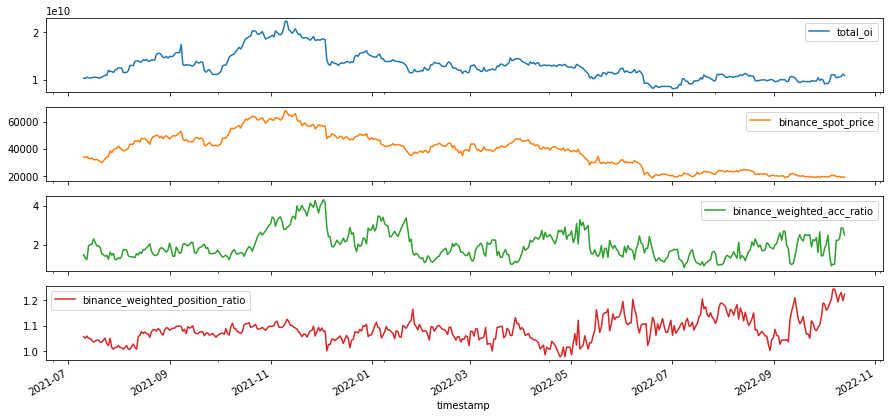

In [399]:
df[df.index < '2022-10-14'][['total_oi',
                        'binance_spot_price',
                        'binance_weighted_acc_ratio',
                        'binance_weighted_position_ratio']].plot(subplots = True)

array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>],
      dtype=object)

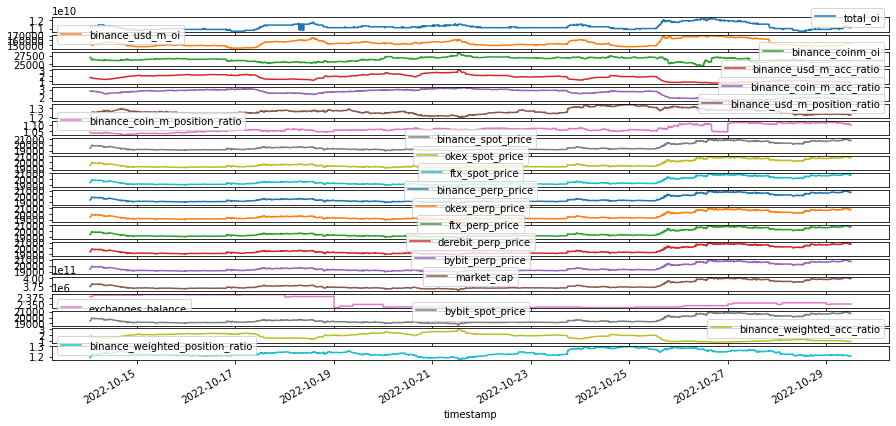

In [400]:
df[df.index >= '2022-10-14'].plot(subplots = True)

В итоге:
- первая группа данных будет содержать строки с timestamp'ом 2021-07-10 - 2022-10-13 (примерно 15 месяцев, 439 наблюдений),
- вторая группа данных будет содержать строки с timestamp'ом 2022-10-14 - 2022-10-29 (15 дней, 4387 наблюдений).

In [401]:
df_long = df[df.index <'2022-10-14'][['binance_spot_price',
                                      'total_oi',  
                                      'binance_weighted_acc_ratio',
                                      'binance_weighted_position_ratio']]

In [402]:
df_long.shape

(439, 4)

In [403]:
df_long.head()

,binance_spot_price,total_oi,binance_weighted_acc_ratio,binance_weighted_position_ratio
timestamp,,,,
2021-07-10 12:00:00,33800.0,1.032000e+10,1.474762,1.056429
2021-07-11 12:00:00,33500.0,1.027000e+10,1.311786,1.050833
2021-07-12 12:00:00,34200.0,1.054000e+10,1.229419,1.058605
2021-07-13 12:00:00,33000.0,1.036000e+10,1.940000,1.049412
2021-07-14 12:00:00,32500.0,1.037000e+10,2.006889,1.049778


In [655]:
df_short = df[df.index >= '2022-10-14']

In [656]:
df_short.head()

,total_oi,binance_usd_m_oi,binance_coinm_oi,binance_usd_m_acc_ratio,binance_coin_m_acc_ratio,binance_usd_m_position_ratio,binance_coin_m_position_ratio,binance_spot_price,okex_spot_price,ftx_spot_price,binance_perp_price,okex_perp_price,ftx_perp_price,derebit_perp_price,bybit_perp_price,market_cap,exchanges_balance,bybit_spot_price,binance_weighted_acc_ratio,binance_weighted_position_ratio
timestamp,,,,,,,,,,,,,,,,,,,,
2022-10-14 01:05:00,1.130000e+10,154286.77,27021.24,1.6518,2.8256,1.2172,1.0412,19423.77,19425.0,19432.0,19412.9,19426.0,19426.0,19425.5,19414.5,3.724892e+11,2379265.98,19423.37,1.826737,1.190970
2022-10-14 01:10:00,1.130000e+10,154326.80,27028.84,1.6497,2.8256,1.2190,1.0405,19421.10,19419.8,19421.0,19407.3,19418.2,19417.0,19411.5,19411.0,3.725276e+11,2379265.98,19419.73,1.824954,1.192397
2022-10-14 01:20:00,1.130000e+10,154696.77,26931.53,1.6469,2.8344,1.2205,1.0372,19446.87,19448.3,19452.0,19440.0,19449.3,19447.0,19445.0,19438.0,3.727227e+11,2379265.98,19448.15,1.822980,1.193321
2022-10-14 01:25:00,1.130000e+10,154715.08,26941.53,1.6469,2.8300,1.2204,1.0356,19448.93,19448.6,19451.0,19440.3,19449.8,19447.0,19448.0,19434.5,3.728931e+11,2379265.98,19449.53,1.822366,1.192992
2022-10-14 01:55:00,1.130000e+10,148988.41,26199.67,1.7071,2.8506,1.2446,1.0291,19922.34,19923.1,19925.0,19917.9,19926.9,19924.0,19918.5,19913.0,3.802337e+11,2379265.98,19921.30,1.878112,1.212372


In [657]:
df_short.shape

(4387, 20)

## Работаем с df_long

In [407]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

In [408]:
TRAIN_SPLIT = 300

In [409]:
tf.random.set_seed(13)

### Univariate time-series 

In [410]:
uni_data = df_long['binance_spot_price']

In [411]:
# uni_data.index = df['Date Time']

In [412]:
uni_data.head()

timestamp
2021-07-10 12:00:00    33800.0
2021-07-11 12:00:00    33500.0
2021-07-12 12:00:00    34200.0
2021-07-13 12:00:00    33000.0
2021-07-14 12:00:00    32500.0
Name: binance_spot_price, dtype: float64

array([<AxesSubplot:xlabel='timestamp'>], dtype=object)

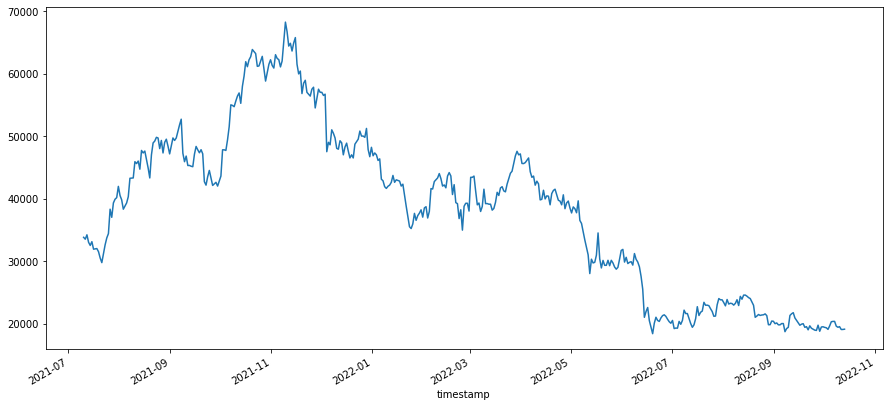

In [413]:
uni_data.plot(subplots=True)

In [414]:
uni_data = uni_data.values

In [415]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()     # среднее
uni_train_std = uni_data[:TRAIN_SPLIT].std()       # станд отклонение

In [416]:
uni_data = (uni_data-uni_train_mean)/uni_train_std     # standartization

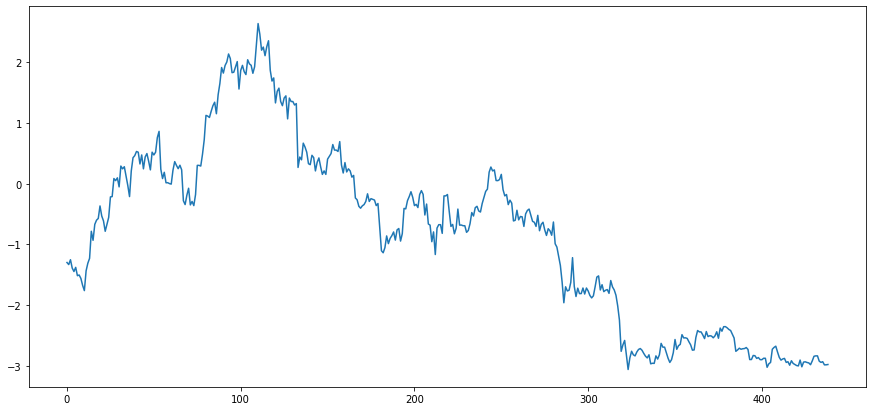

In [417]:
plt.plot(uni_data)
plt.show()

In [418]:
univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [419]:
x_train_uni[0]

array([[-1.30046105],
       [-1.33478217],
       [-1.25469954],
       [-1.39198405],
       [-1.44918593],
       [-1.38054368],
       [-1.51782818],
       [-1.50638781],
       [-1.56358968],
       [-1.67799344],
       [-1.76379626],
       [-1.43774555],
       [-1.31190142],
       [-1.23181879],
       [-0.78564415],
       [-0.93436903],
       [-0.67124039],
       [-0.60259814],
       [-0.5739972 ],
       [-0.36807044]])

In [420]:
y_train_uni[0]

-0.5339558852487483

In [421]:
def create_time_steps(length):
    return list(range(-length, 0))

In [422]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel('Time-Step')
    return plt

### среднее за последние n наблюдений как прогноз

In [423]:
def baseline(history):
    return np.mean(history)

<module 'matplotlib.pyplot' from 'C:\\Users\\Pc\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

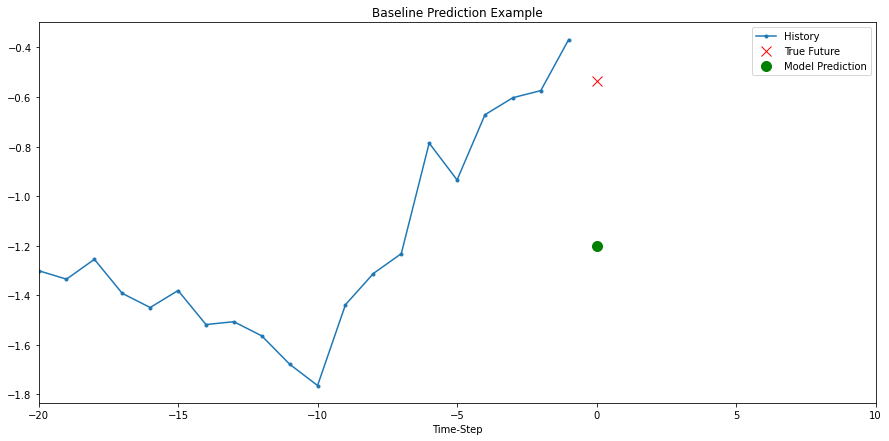

In [424]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

### RNN Long short-term memory LSTM

In [425]:
BATCH_SIZE = 50
BUFFER_SIZE = 3000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [426]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(10, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])
# simple_lstm_model.compile(optimizer='adam', loss='mae')
simple_lstm_model.compile(optimizer='adam', loss='mse')
# simple_lstm_model.compile(loss='binary_crossentropy',optimizer='rmsprop', metrics=['accuracy'])


In [427]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

2/2 [==============================] - 0s 10ms/step
(50, 1)


In [428]:
print(x_train_uni.shape)

(280, 20, 1)


In [429]:
val_univariate

<RepeatDataset element_spec=(TensorSpec(shape=(None, 20, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

Обучение модели

In [430]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate,
                      epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate,
                      validation_steps = 50)

Epoch 1/10
200/200 [==============================] - 3s 8ms/step - loss: 0.1442 - val_loss: 1.7075
Epoch 2/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0607 - val_loss: 0.7007
Epoch 3/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0464 - val_loss: 0.4052
Epoch 4/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0414 - val_loss: 0.2753
Epoch 5/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0391 - val_loss: 0.2185
Epoch 6/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0378 - val_loss: 0.1872
Epoch 7/10
200/200 [==============================] - 1s 6ms/step - loss: 0.0372 - val_loss: 0.1604
Epoch 8/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0366 - val_loss: 0.1539
Epoch 9/10
200/200 [==============================] - 1s 7ms/step - loss: 0.0365 - val_loss: 0.1486
Epoch 10/10
200/200 [==============================] - 2s 8ms/step - loss: 0.0362 - val_loss: 0.1399

Прогнозы

2/2 [==============================] - 0s 17ms/step


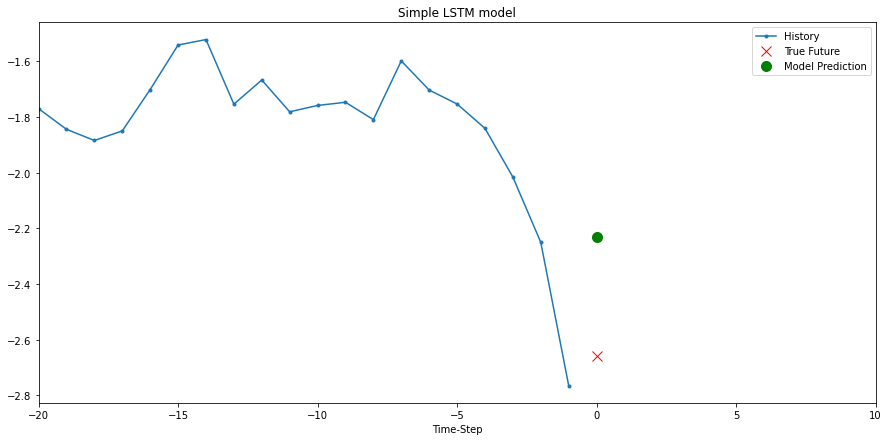

2/2 [==============================] - 0s 3ms/step


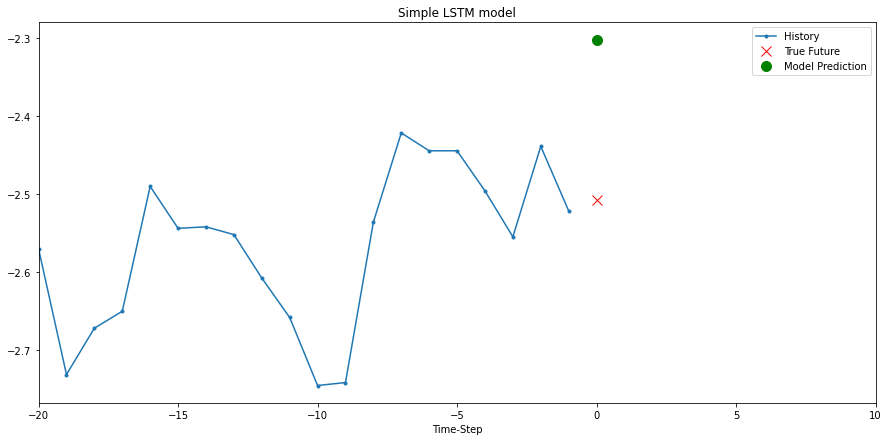

In [447]:
for x, y in val_univariate.take(2):
    plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
    plot.show()

### Multivariate time-series 

In [432]:
features_considered = ['total_oi',  'binance_weighted_acc_ratio', 'binance_weighted_position_ratio']

In [433]:
features = df_long[features_considered]
features.head()

,total_oi,binance_weighted_acc_ratio,binance_weighted_position_ratio
timestamp,,,
2021-07-10 12:00:00,1.032000e+10,1.474762,1.056429
2021-07-11 12:00:00,1.027000e+10,1.311786,1.050833
2021-07-12 12:00:00,1.054000e+10,1.229419,1.058605
2021-07-13 12:00:00,1.036000e+10,1.940000,1.049412
2021-07-14 12:00:00,1.037000e+10,2.006889,1.049778


array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>], dtype=object)

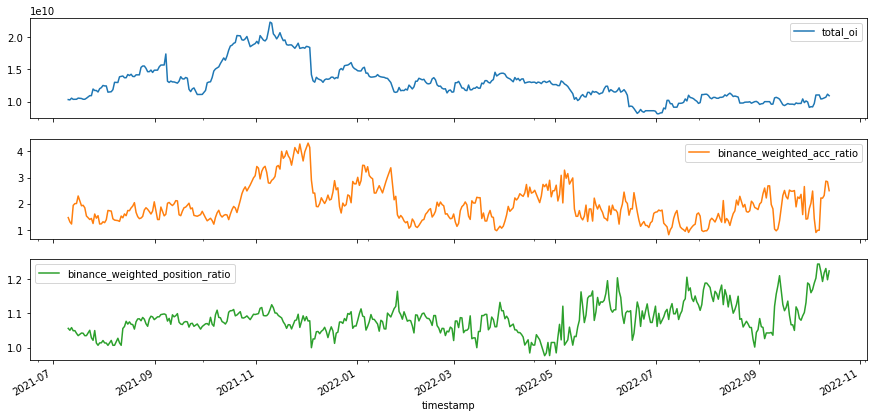

In [434]:
features.plot(subplots=True)

Стандартизация

In [435]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

In [436]:
dataset = (dataset-data_mean)/data_std

### one-step / single step model

In [437]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [438]:
past_history = 30        # кол-во наблюдений, каждые 10 минут 5 дней, обучение
future_target = 2        # кол-во наблюдений, каждые 10 минут 12 часов, прогноз
# STEP = 6
STEP = 1
x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

Проверка

In [439]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (30, 3)


In [440]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

Построение нейронной сети

In [441]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(60,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

# single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')
single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mse')

In [442]:
for x, y in val_data_single.take(1):
    print(single_step_model.predict(x).shape)

2/2 [==============================] - 0s 7ms/step
(50, 1)


In [443]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Epoch 1/10
200/200 [==============================] - 6s 21ms/step - loss: 0.2842 - val_loss: 0.8422
Epoch 2/10
200/200 [==============================] - 4s 19ms/step - loss: 0.1291 - val_loss: 0.8294
Epoch 3/10
200/200 [==============================] - 4s 20ms/step - loss: 0.0955 - val_loss: 0.7829
Epoch 4/10
200/200 [==============================] - 4s 21ms/step - loss: 0.0813 - val_loss: 0.7861
Epoch 5/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0704 - val_loss: 0.7683
Epoch 6/10
200/200 [==============================] - 4s 20ms/step - loss: 0.0625 - val_loss: 0.6844
Epoch 7/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0571 - val_loss: 0.7909
Epoch 8/10
200/200 [==============================] - 4s 22ms/step - loss: 0.0517 - val_loss: 0.7114
Epoch 9/10
200/200 [==============================] - 4s 19ms/step - loss: 0.0465 - val_loss: 0.7360
Epoch 10/10
200/200 [==============================] - 4s 20ms/step - loss: 0.0428 - val_lo

In [444]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

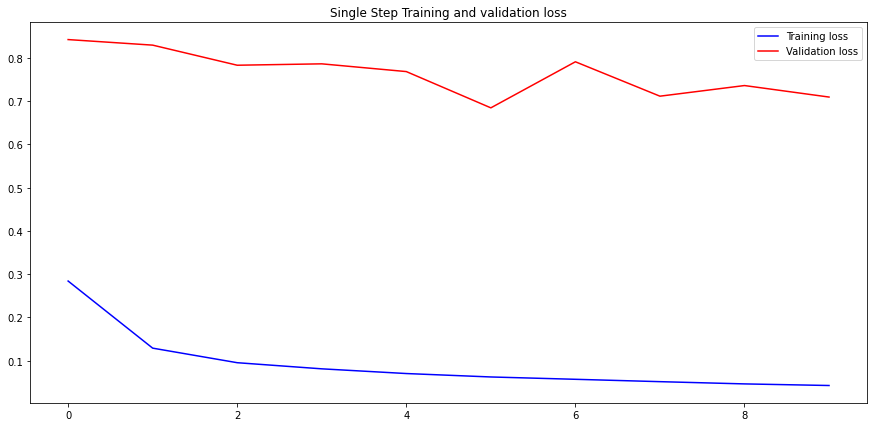

In [445]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

Точечный прогноз

2/2 [==============================] - 0s 7ms/step


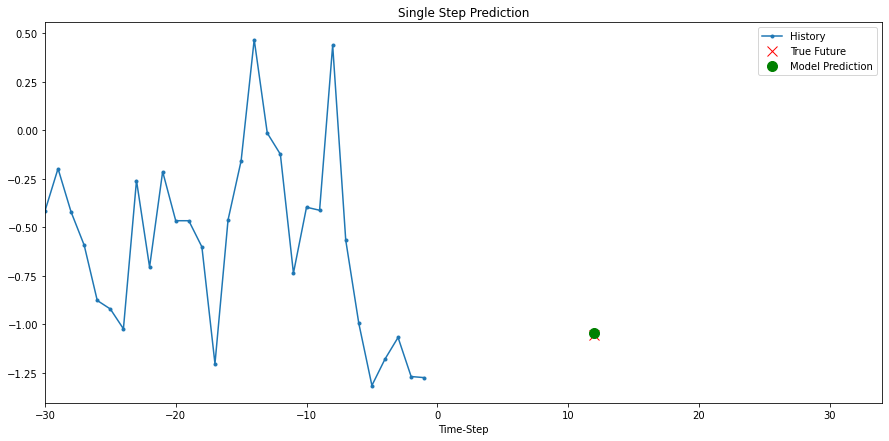

In [448]:
for x, y in val_data_single.take(1):
    plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
    plot.show()
    # временной инт 120 = 5*24

### multi step model

In [481]:
future_target = 14
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

Проверка

In [482]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (30, 3)

 Target temperature to predict : (14,)


In [483]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [484]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12, 6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, 1]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

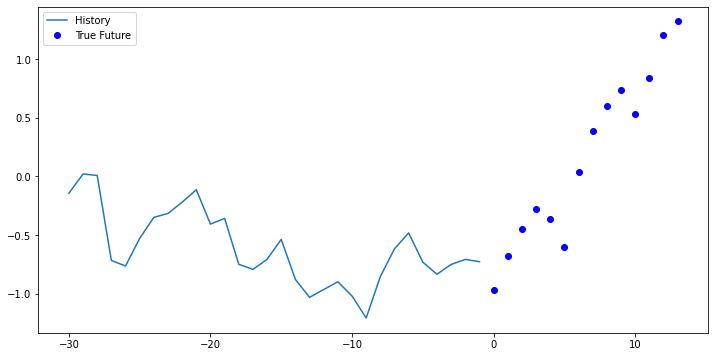

In [485]:
for x, y in train_data_multi.take(1):
    multi_step_plot(x[0], y[0], np.array([0]))

Построение нейронной сети

In [486]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(32, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(14))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mse')

In [487]:
for x, y in val_data_multi.take(1):
    print (multi_step_model.predict(x).shape)

2/2 [==============================] - 0s 6ms/step
(50, 14)


In [488]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/10
200/200 [==============================] - 7s 22ms/step - loss: 0.4069 - val_loss: 5.5109
Epoch 2/10
200/200 [==============================] - 4s 20ms/step - loss: 0.1857 - val_loss: 3.7470
Epoch 3/10
200/200 [==============================] - 4s 20ms/step - loss: 0.1426 - val_loss: 1.7688
Epoch 4/10
200/200 [==============================] - 4s 20ms/step - loss: 0.1198 - val_loss: 1.4919
Epoch 5/10
200/200 [==============================] - 4s 21ms/step - loss: 0.1058 - val_loss: 0.9517
Epoch 6/10
200/200 [==============================] - 4s 21ms/step - loss: 0.0953 - val_loss: 0.8572
Epoch 7/10
200/200 [==============================] - 5s 23ms/step - loss: 0.0882 - val_loss: 0.7889
Epoch 8/10
200/200 [==============================] - 5s 24ms/step - loss: 0.0821 - val_loss: 0.7121
Epoch 9/10
200/200 [==============================] - 7s 34ms/step - loss: 0.0779 - val_loss: 0.7396
Epoch 10/10
200/200 [==============================] - 8s 37ms/step - loss: 0.0734 - val_lo

Кривые потерь

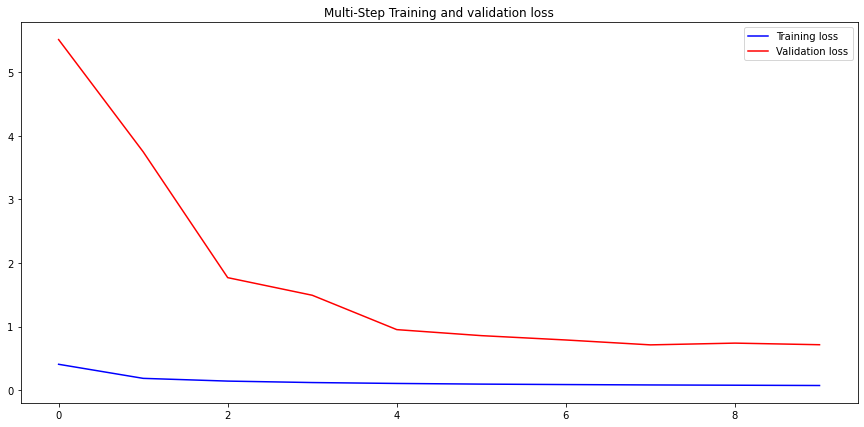

In [489]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

2/2 [==============================] - 0s 21ms/step


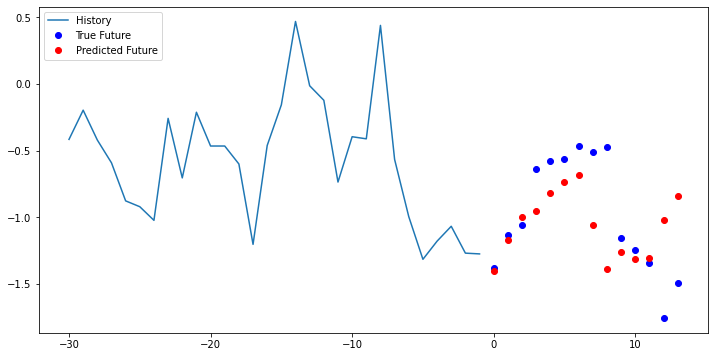

In [490]:
for x, y in val_data_multi.take(1):
    multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

In [491]:
# dataset = features[300000:].values
# TRAIN_SPLIT = 85000

## Работаем с df_short

In [658]:
df_short.shape

(4387, 20)

In [659]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        # Reshape data from (history_size,) to (history_size, 1)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

In [660]:
TRAIN_SPLIT = 3000

In [661]:
tf.random.set_seed(13)

### Univariate time-series 

In [690]:
uni_data = df_short['binance_spot_price']

In [691]:
df_short[df_short.isna().any(1)]

,total_oi,binance_usd_m_oi,binance_coinm_oi,binance_usd_m_acc_ratio,binance_coin_m_acc_ratio,binance_usd_m_position_ratio,binance_coin_m_position_ratio,binance_spot_price,okex_spot_price,ftx_spot_price,binance_perp_price,okex_perp_price,ftx_perp_price,derebit_perp_price,bybit_perp_price,market_cap,exchanges_balance,bybit_spot_price,binance_weighted_acc_ratio,binance_weighted_position_ratio
timestamp,,,,,,,,,,,,,,,,,,,,


In [692]:
# df_short = df_short.fillna(df_short.mean())
df_short = df_short.dropna()

In [693]:
df_short.shape

(4372, 20)

In [694]:
# uni_data.index = df['Date Time']

In [695]:
uni_data.head()

timestamp
2022-10-14 01:05:00    19423.77
2022-10-14 01:10:00    19421.10
2022-10-14 01:20:00    19446.87
2022-10-14 01:25:00    19448.93
2022-10-14 01:55:00    19922.34
Name: binance_spot_price, dtype: float64

array([<AxesSubplot:xlabel='timestamp'>], dtype=object)

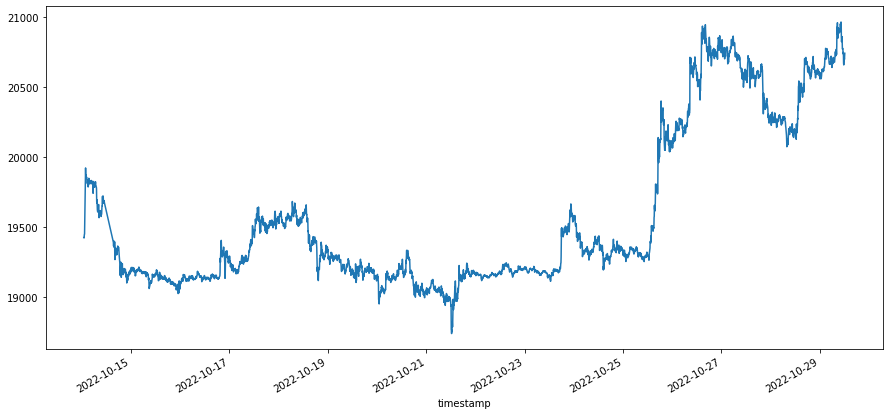

In [696]:
uni_data.plot(subplots=True)

In [697]:
uni_data = uni_data.values

In [698]:
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()     # среднее
uni_train_std = uni_data[:TRAIN_SPLIT].std()       # станд отклонение

In [699]:
uni_data = (uni_data-uni_train_mean)/uni_train_std     # standartization

In [700]:
univariate_past_history = 60
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)

In [701]:
x_train_uni[0]

array([[0.9556378 ],
       [0.94079181],
       [1.08408057],
       [1.09553478],
       [3.72783325],
       [3.42907869],
       [3.45893747],
       [3.32426716],
       [3.35445956],
       [3.18247968],
       [3.1070821 ],
       [3.12582029],
       [3.20199631],
       [3.25604236],
       [3.07766815],
       [2.97230059],
       [2.99537581],
       [3.08873314],
       [3.11959276],
       [3.31692758],
       [3.1430572 ],
       [3.09023442],
       [3.18753955],
       [3.18642749],
       [3.17880989],
       [3.21851038],
       [3.14261238],
       [3.14038826],
       [3.10074337],
       [3.19120934],
       [3.22918615],
       [3.22340344],
       [3.11987078],
       [3.10174422],
       [3.13076895],
       [3.11920354],
       [3.19715886],
       [3.14800586],
       [3.15862602],
       [3.18292451],
       [3.0899008 ],
       [2.71947405],
       [2.99826716],
       [3.17653017],
       [3.18859601],
       [3.10808296],
       [3.03641078],
       [3.013

In [702]:
y_train_uni[0]

2.9685195940445364

In [703]:
def create_time_steps(length):
    return list(range(-length, 0))

In [704]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel('Time-Step')
    return plt

### среднее за последние n наблюдений как прогноз

In [705]:
def baseline(history):
    return np.mean(history)

<module 'matplotlib.pyplot' from 'C:\\Users\\Pc\\miniconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

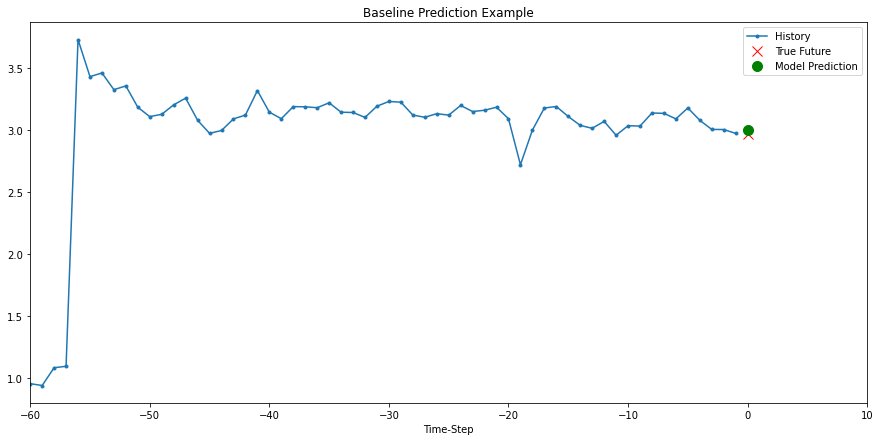

In [706]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Baseline Prediction Example')

### RNN Long short-term memory LSTM

In [719]:
BATCH_SIZE =200
BUFFER_SIZE = 5000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [720]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(16, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])
# optimizer_short = optimizers.Adam(clipvalue=0.5)
simple_lstm_model.compile(optimizer='adam', loss='mae')

In [721]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

7/7 [==============================] - 1s 12ms/step
(200, 1)


In [722]:
print(x_train_uni.shape)

(2940, 60, 1)


Обучение модели

In [723]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50)

Epoch 1/10
200/200 [==============================] - 14s 58ms/step - loss: 0.3457 - val_loss: 4.4762
Epoch 2/10
200/200 [==============================] - 12s 61ms/step - loss: 0.1111 - val_loss: 3.7564
Epoch 3/10
200/200 [==============================] - 13s 67ms/step - loss: 0.0916 - val_loss: 3.3440
Epoch 4/10
200/200 [==============================] - 13s 65ms/step - loss: 0.0785 - val_loss: 3.2010
Epoch 5/10
200/200 [==============================] - 12s 60ms/step - loss: 0.0722 - val_loss: 3.1142
Epoch 6/10
200/200 [==============================] - 12s 58ms/step - loss: 0.0696 - val_loss: 3.0497
Epoch 7/10
200/200 [==============================] - 11s 57ms/step - loss: 0.0684 - val_loss: 3.0130
Epoch 8/10
200/200 [==============================] - 12s 61ms/step - loss: 0.0681 - val_loss: 2.9809
Epoch 9/10
200/200 [==============================] - 13s 65ms/step - loss: 0.0671 - val_loss: 2.9570
Epoch 10/10
200/200 [==============================] - 13s 64ms/step - loss: 0.067

Прогнозы

7/7 [==============================] - 0s 17ms/step


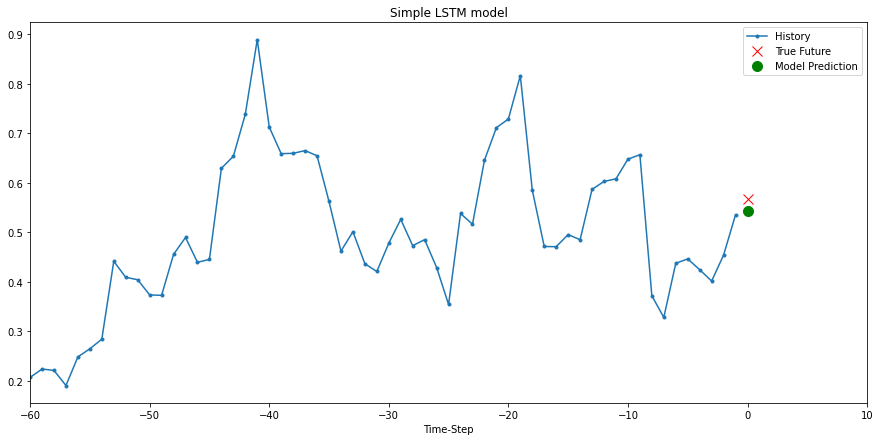

In [724]:
for x, y in val_univariate.take(1):
    plot = show_plot([x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Simple LSTM model')
    plot.show()

### Multivariate time-series 

In [725]:
features_considered = ['binance_spot_price',
                                         'total_oi',
                                         'binance_usd_m_oi',
                                         'binance_coinm_oi',
                                         'binance_usd_m_acc_ratio',
                                         'binance_coin_m_acc_ratio',
                                         'binance_usd_m_position_ratio',
                                         'binance_coin_m_position_ratio',
                                         'binance_perp_price',
                                         'market_cap',
                                         'exchanges_balance',
                                         'binance_weighted_acc_ratio',
                                         'binance_weighted_position_ratio']

In [726]:
features = df_short[features_considered]
features.head()

,binance_spot_price,total_oi,binance_usd_m_oi,binance_coinm_oi,binance_usd_m_acc_ratio,binance_coin_m_acc_ratio,binance_usd_m_position_ratio,binance_coin_m_position_ratio,binance_perp_price,market_cap,exchanges_balance,binance_weighted_acc_ratio,binance_weighted_position_ratio
timestamp,,,,,,,,,,,,,
2022-10-14 01:05:00,19423.77,1.130000e+10,154286.77,27021.24,1.6518,2.8256,1.2172,1.0412,19412.9,3.724892e+11,2379265.98,1.826737,1.190970
2022-10-14 01:10:00,19421.10,1.130000e+10,154326.80,27028.84,1.6497,2.8256,1.2190,1.0405,19407.3,3.725276e+11,2379265.98,1.824954,1.192397
2022-10-14 01:20:00,19446.87,1.130000e+10,154696.77,26931.53,1.6469,2.8344,1.2205,1.0372,19440.0,3.727227e+11,2379265.98,1.822980,1.193321
2022-10-14 01:25:00,19448.93,1.130000e+10,154715.08,26941.53,1.6469,2.8300,1.2204,1.0356,19440.3,3.728931e+11,2379265.98,1.822366,1.192992
2022-10-14 01:55:00,19922.34,1.130000e+10,148988.41,26199.67,1.7071,2.8506,1.2446,1.0291,19917.9,3.802337e+11,2379265.98,1.878112,1.212372


array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>,
       <AxesSubplot:xlabel='timestamp'>], dtype=object)

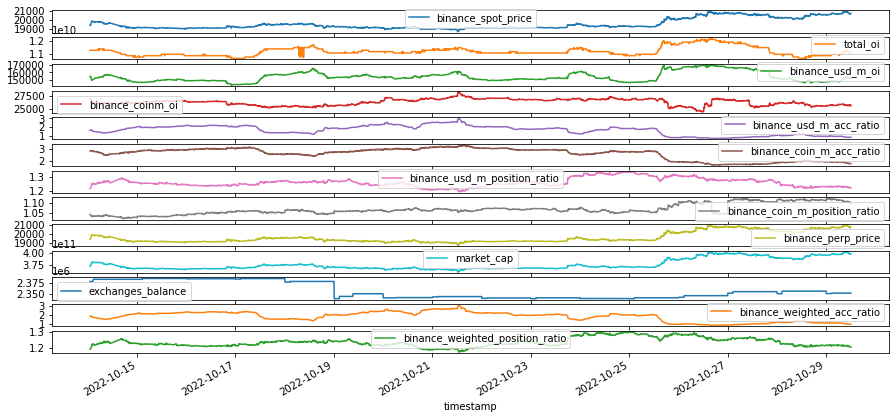

In [727]:
features.plot(subplots=True)

Стандартизация

In [728]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

In [729]:
dataset = (dataset-data_mean)/data_std

### one-step / single step model

In [730]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)

In [731]:
past_history = 720        # кол-во наблюдений, каждые 10 минут 5 дней, обучение
future_target = 72        # кол-во наблюдений, каждые 10 минут 12 часов, прогноз
STEP = 6
# STEP = 1
x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

Проверка

In [732]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (120, 13)


In [733]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

Построение нейронной сети

In [734]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [735]:
for x, y in val_data_single.take(1):
    print(single_step_model.predict(x).shape)

7/7 [==============================] - 1s 26ms/step
(200, 1)


In [736]:
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Epoch 1/10
200/200 [==============================] - 43s 203ms/step - loss: 0.2746 - val_loss: 1.9185
Epoch 2/10
200/200 [==============================] - 38s 190ms/step - loss: 0.1598 - val_loss: 1.9404
Epoch 3/10
200/200 [==============================] - 41s 204ms/step - loss: 0.1438 - val_loss: 1.8670
Epoch 4/10
200/200 [==============================] - 40s 198ms/step - loss: 0.1321 - val_loss: 1.8456
Epoch 5/10
200/200 [==============================] - 42s 209ms/step - loss: 0.1248 - val_loss: 1.8631
Epoch 6/10
200/200 [==============================] - 39s 194ms/step - loss: 0.1204 - val_loss: 1.8644
Epoch 7/10
200/200 [==============================] - 38s 190ms/step - loss: 0.1170 - val_loss: 1.8595
Epoch 8/10
200/200 [==============================] - 40s 197ms/step - loss: 0.1143 - val_loss: 1.8516
Epoch 9/10
200/200 [==============================] - 38s 192ms/step - loss: 0.1113 - val_loss: 1.8269
Epoch 10/10
200/200 [==============================] - 38s 189ms/step - l

In [737]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(loss))

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title)
    plt.legend()

    plt.show()

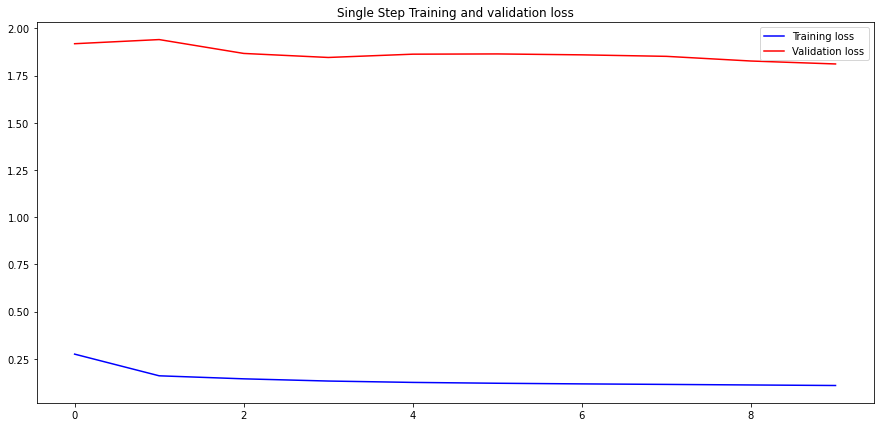

In [738]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

Точечный прогноз

7/7 [==============================] - 0s 34ms/step


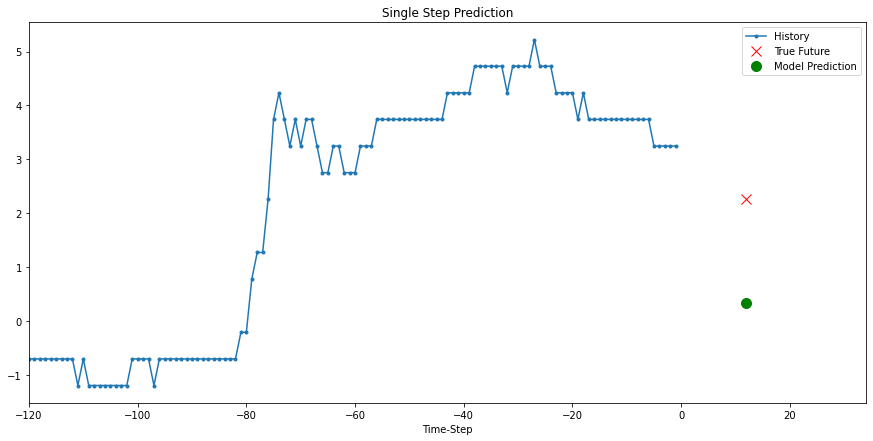

In [739]:
for x, y in val_data_single.take(1):
    plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
    plot.show()
    # временной инт 120 = 5*24

### multi step model

In [740]:
future_target = 7
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

Проверка

In [741]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (120, 13)

 Target temperature to predict : (7,)


In [742]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [743]:
def multi_step_plot(history, true_future, prediction):
    plt.figure(figsize=(12, 6))
    num_in = create_time_steps(len(history))
    num_out = len(true_future)

    plt.plot(num_in, np.array(history[:, 1]), label='History')
    plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
    if prediction.any():
        plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
    plt.legend(loc='upper left')
    plt.show()

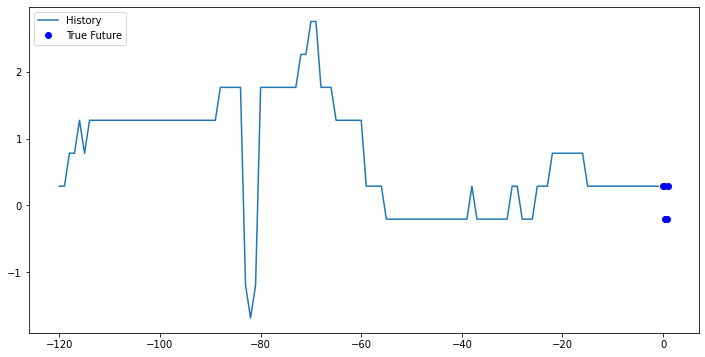

In [744]:
for x, y in train_data_multi.take(1):
    multi_step_plot(x[0], y[0], np.array([0]))

Построение нейронной сети

In [745]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(7))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [746]:
for x, y in val_data_multi.take(1):
    print (multi_step_model.predict(x).shape)

7/7 [==============================] - 1s 46ms/step
(200, 7)


In [ ]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/10
200/200 [==============================] - 71s 340ms/step - loss: 0.3119 - val_loss: 2.8239
Epoch 2/10
164/200 [=======================>......] - ETA: 11s - loss: 0.1677

Кривые потерь

In [ ]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

In [ ]:
for x, y in val_data_multi.take(1):
    multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])